## Titanic Survival Prediction

### Importing all the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Exploration

In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


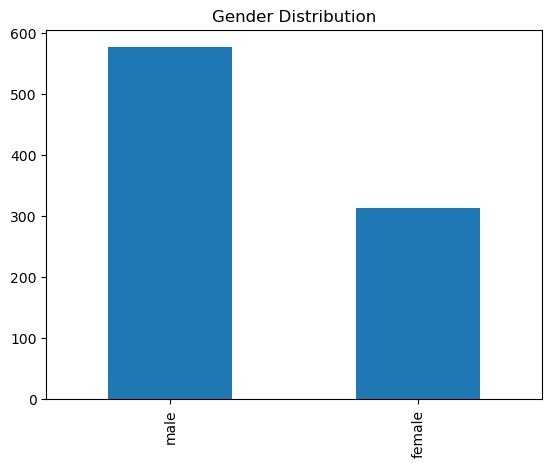

In [6]:
data['Sex'].value_counts().plot.bar()
plt.title('Gender Distribution',loc='center');

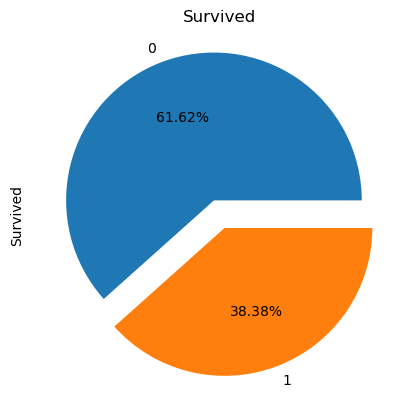

In [7]:
data['Survived'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%')
plt.title('Survived',loc='center');

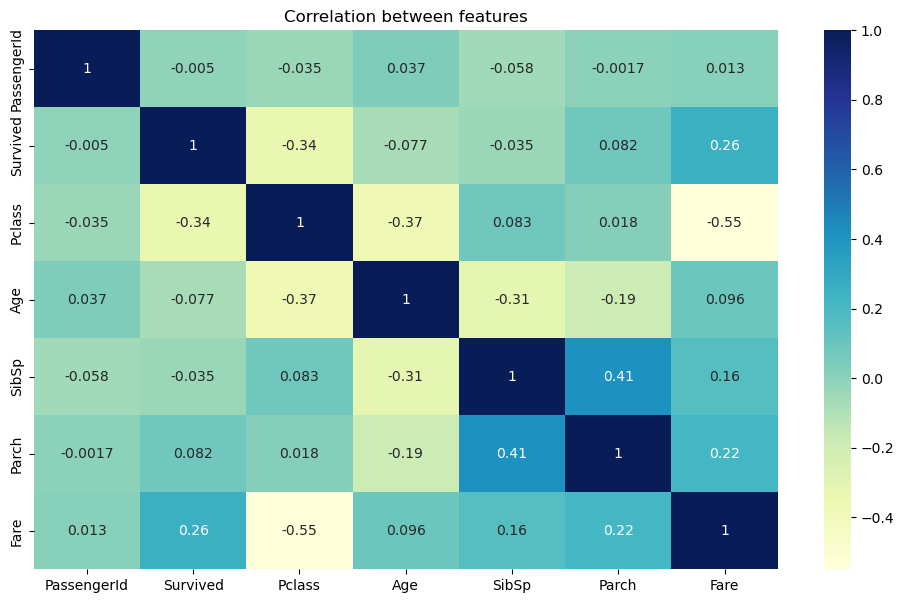

In [8]:
corr=data.corr()#["Survived"]
plt.figure(figsize=(12, 7))
sns.heatmap(corr,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [9]:
hig_corr = data.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Survived', 'Pclass', 'Fare'], dtype='object')

### Methods to find Missing Values

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Feature Engineering

In [11]:
#Filling/Removing Missing Values
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [12]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
data['Embarked'] = data['Embarked'].fillna(method='bfill')

In [14]:
final_data = data.drop(['Cabin'],axis=1,inplace = True)
final_data

In [15]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

All the Missing Value is Filled/Removed

In [16]:
data= data.drop(['Name','Ticket'],axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [17]:
data = pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Categorical feature (Sex & Embarked) is converted into numerical feature by using pandas dummy method

In [18]:
#Train Test Split
X = data.drop(['Survived'],axis=1) 

In [19]:
y = data['Survived']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

In [21]:
len(X_train)

712

In [22]:
len(X_test)

179

### Standardizing the data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [25]:
print(X_train.head())

   PassengerId    Pclass       Age     SibSp     Parch      Fare  Sex_male  \
0     1.360492 -1.584396  0.010681 -0.479698 -0.460682 -0.018600  0.728823   
1    -1.632266 -1.584396 -0.119643 -0.479698 -0.460682  0.079245  0.728823   
2    -1.344650 -1.584396 -0.503148 -0.479698  0.810657  0.646624  0.728823   
3    -1.686680 -0.381742 -1.193456  0.493365 -0.460682 -0.031329 -1.372075   
4    -1.111449  0.820913  0.033758 -0.479698 -0.460682 -0.479818  0.728823   

   Embarked_Q  Embarked_S  
0   -0.311564   -1.611198  
1   -0.311564    0.620656  
2   -0.311564   -1.611198  
3   -0.311564   -1.611198  
4   -0.311564    0.620656  


In [26]:
print(X_test.head())

   PassengerId    Pclass       Age     SibSp     Parch      Fare  Sex_male  \
0     0.676433  0.820913 -0.273045  0.493365 -0.460682 -0.315867 -1.372075   
1    -0.248601  0.820913 -0.809952 -0.479698 -0.460682 -0.485419  0.728823   
2     1.096196  0.820913 -0.733251 -0.479698 -0.460682 -0.467343  0.728823   
3     1.488753  0.820913  0.010681 -0.479698 -0.460682  0.506858  0.728823   
4     0.027354 -0.381742  0.493964  0.493365  2.081997 -0.078596  0.728823   

   Embarked_Q  Embarked_S  
0   -0.311564    0.620656  
1   -0.311564    0.620656  
2   -0.311564    0.620656  
3   -0.311564    0.620656  
4   -0.311564    0.620656  


### Model Implementation

#### Random Forest

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
Y_pred = random_forest.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0], dtype=int64)

In [30]:
random_forest.score(X_train, y_train)

1.0

In [31]:
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
print("Training Accuracy     :",random_forest_train)
print("Model Accuracy Score  :",random_forest_accuracy)

Training Accuracy     : 100.0
Model Accuracy Score  : 79.33


#### KNeighborsClassifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [33]:
Y_pred = KNN.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0], dtype=int64)

In [34]:
KNN_train = round(KNN.score(X_train, y_train) * 100, 2)
KNN_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
print("Training Accuracy     :",KNN_train)
print("Model Accuracy Score  :",KNN_accuracy)

Training Accuracy     : 85.25
Model Accuracy Score  : 78.21


#### Support Vector Machines

In [35]:


from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [36]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0], dtype=int64)

In [37]:
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(Y_pred, y_test) * 100, 2)
print("Training Accuracy     :",svc_train)
print("Model Accuracy Score  :",svc_accuracy)

Training Accuracy     : 85.11
Model Accuracy Score  : 80.45


### Comparing Models

In [38]:
models = pd.DataFrame({'Model': ['Random Forest', 'KNN','Support Vector Machines'],
    'Training Accuracy': [random_forest_train, KNN_train,svc_train],
    'Model Accuracy Score': [random_forest_accuracy, KNN_accuracy,svc_accuracy]})

In [39]:
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
0,Random Forest,100.00,79.33
1,KNN,85.25,78.21
2,Support Vector Machines,85.11,80.45


In this case we used Three machine learning techniques in which Random forest achieved the highest performance with approximately 81%. SVM can be recommended as well with 80% accuracy. Decision Tree achieved 78% accuracy.